In [1]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# read csv file (output.csv is the output file obtained after data analytics)
df = pd.read_csv('output.csv')

In [3]:
df

,Unnamed: 0,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,9046,0.816895,0,1,1,1,0.934478,0.632212,1,1,0,0,1,0,0,1,0,0
1,1,51676,0.743652,0,0,1,0,0.791913,0.427885,1,0,0,0,0,1,0,0,1,0
2,2,31112,0.975586,0,1,1,0,0.273501,0.533654,1,1,0,0,1,0,0,0,1,0
3,3,60182,0.597168,0,0,1,1,0.625121,0.579327,1,0,0,0,1,0,0,0,0,1
4,4,1665,0.963379,1,0,1,0,0.640681,0.329327,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997,5105,18234,0.975586,1,0,1,1,0.154140,0.427885,0,0,0,0,1,0,0,0,1,0
4998,5106,44873,0.987793,0,0,1,1,0.377302,0.713942,0,0,0,0,0,1,0,0,1,0
4999,5107,19723,0.426270,0,0,1,0,0.150048,0.487981,0,0,0,0,0,1,0,0,1,0
5000,5108,37544,0.621582,0,0,1,0,0.598525,0.367788,0,1,0,0,1,0,0,1,0,0


In [4]:
# considering stroke as a target column and moving at the end of df 
colmn=df.pop("stroke")
df.insert(17,"stroke",colmn)
df.head()

,Unnamed: 0,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,stroke,smoking_status_smokes
0,0,9046,0.816895,0,1,1,1,0.934478,0.632212,1,0,0,1,0,0,1,0,1,0
1,1,51676,0.743652,0,0,1,0,0.791913,0.427885,0,0,0,0,1,0,0,1,1,0
2,2,31112,0.975586,0,1,1,0,0.273501,0.533654,1,0,0,1,0,0,0,1,1,0
3,3,60182,0.597168,0,0,1,1,0.625121,0.579327,0,0,0,1,0,0,0,0,1,1
4,4,1665,0.963379,1,0,1,0,0.640681,0.329327,0,0,0,0,1,0,0,1,1,0


# Select Important Features and create a dataframe

[2.10576429e-01 2.04451841e-01 1.29607554e-02 1.04458668e-02
 1.41556275e-02 1.87197838e-02 2.10006426e-01 2.08777082e-01
 1.76070920e-02 5.76818635e-06 9.59372725e-04 1.75391409e-02
 9.21706514e-03 1.65958448e-02 4.79819040e-02]


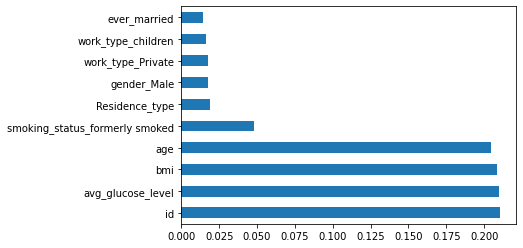

In [5]:
# Top 10 important features in df, higher the score more relevant the feature towards output variable.
import pandas as pd
import numpy as np

X = df.iloc[:,1:16]  #independent columns
y = df.iloc[:,-1]    #target column i.e stroke

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [6]:
# new dataframe creation with features having high scores along with target column

new_df = df[['age','avg_glucose_level', 'bmi','Residence_type','gender_Male','hypertension','stroke']].copy()
new_df.head()

,age,avg_glucose_level,bmi,Residence_type,gender_Male,hypertension,stroke
0,0.816895,0.934478,0.632212,1,1,0,1
1,0.743652,0.791913,0.427885,0,0,0,1
2,0.975586,0.273501,0.533654,0,1,0,1
3,0.597168,0.625121,0.579327,1,0,0,1
4,0.963379,0.640681,0.329327,0,0,1,1


# Split Data to train, test, validate 

In [7]:
from sklearn.model_selection import train_test_split

# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

X =new_df.drop(columns = ['stroke']).copy()
y =new_df['stroke']

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(4001, 6)
(4001,)
(500, 6)
(500,)
(501, 6)
(501,)


(None, None)

In [8]:
X_train

,age,avg_glucose_level,bmi,Residence_type,gender_Male,hypertension
486,0.511719,0.225423,0.588942,1,0,0
2396,0.731445,0.220093,0.822115,1,0,1
4960,0.975586,0.349467,0.336538,1,1,0
1462,0.511719,0.166631,0.408654,1,1,0
1035,1.000000,0.223484,0.389423,0,0,0
...,...,...,...,...,...,...
4995,0.218750,0.149295,0.879808,1,0,0
226,0.829102,0.839561,0.697115,0,0,0
3999,0.829102,0.485248,0.509615,0,1,0
3768,0.023438,0.186982,0.312500,1,1,0


In [9]:
y_train

486     0
2396    0
4960    0
1462    0
1035    0
       ..
4995    0
226     1
3999    0
3768    0
1829    0
Name: stroke, Length: 4001, dtype: int64

# Train, test and evaluate the model 

In [10]:
#It is used when our dependent variable is binary, a variable that has only 2 outputs,i.e. A person will have stroke or not
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [11]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [12]:
print ("Accuracy : ", accuracy_score(y_test, y_pred)*100)

Accuracy :  95.80838323353294


[[480   0]
 [ 21   0]]


<AxesSubplot:>

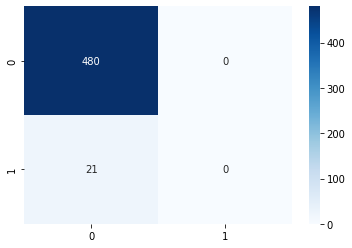

In [13]:
# to define the performance of a classification algorithm use confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, y_pred)
print(conf)
sns.heatmap(conf,annot=True, fmt='', cmap='Blues')

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       480
           1       0.00      0.00      0.00        21

    accuracy                           0.96       501
   macro avg       0.48      0.50      0.49       501
weighted avg       0.92      0.96      0.94       501



C:\Users\hkore\Desktop\DAX-DS-Assignment-2022-Hemangi_Kore\venv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hkore\Desktop\DAX-DS-Assignment-2022-Hemangi_Kore\venv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hkore\Desktop\DAX-DS-Assignment-2022-Hemangi_Kore\venv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

# Save Model to a pickle file 

In [15]:
import pickle

with open('logisticpkl', 'wb') as files:
    pickle.dump(classifier, files)

# Predict values for validate set using pickle file

In [16]:
with open('logisticpkl' , 'rb') as l:
    model = pickle.load(l)

In [17]:
#prediction for the validation set

y_val_pred = classifier.predict(X_valid)
print ("Accuracy : ", accuracy_score(y_valid, y_val_pred)*100)

Accuracy :  96.0


[[480   0]
 [ 20   0]]


<AxesSubplot:>

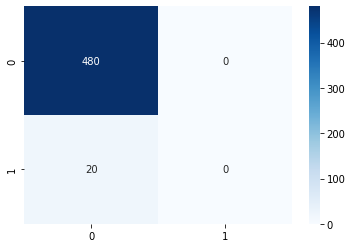

In [18]:
conf = confusion_matrix(y_valid, y_val_pred)
print(conf)
sns.heatmap(conf,annot=True, fmt='', cmap='Blues')

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       480
           1       0.00      0.00      0.00        21

    accuracy                           0.96       501
   macro avg       0.48      0.50      0.49       501
weighted avg       0.92      0.96      0.94       501



C:\Users\hkore\Desktop\DAX-DS-Assignment-2022-Hemangi_Kore\venv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hkore\Desktop\DAX-DS-Assignment-2022-Hemangi_Kore\venv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hkore\Desktop\DAX-DS-Assignment-2022-Hemangi_Kore\venv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

# Write validate set along with it's predicted values to csv file 

In [20]:
final = pd.DataFrame(columns=['actual_stroke','predicted_stroke'])
final.actual_stroke=y_valid
final.predicted_stroke=y_val_pred

In [21]:
final

,actual_stroke,predicted_stroke
3691,0,0
3257,0,0
3697,0,0
3664,0,0
4846,0,0
...,...,...
2080,0,0
2058,0,0
603,0,0
4836,0,0


In [22]:
final.to_csv('validation_predict.csv', index=False)